## Logistic Regression Multiclass Classification

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()

In [17]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [18]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

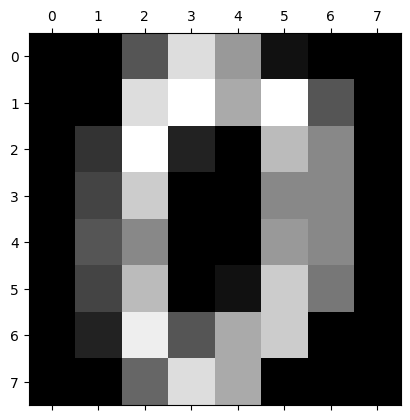

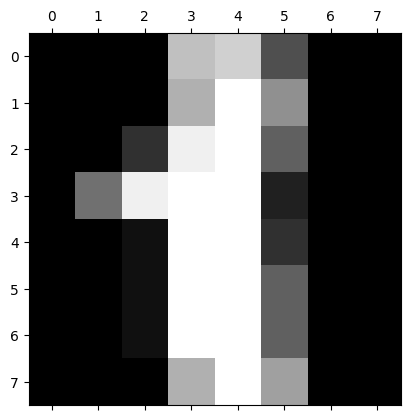

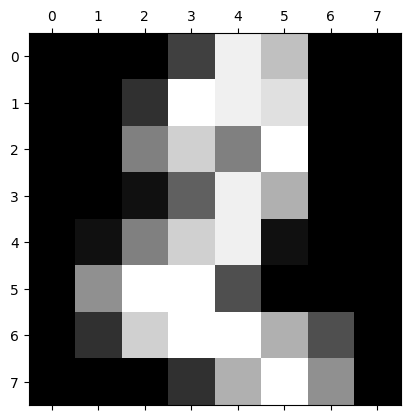

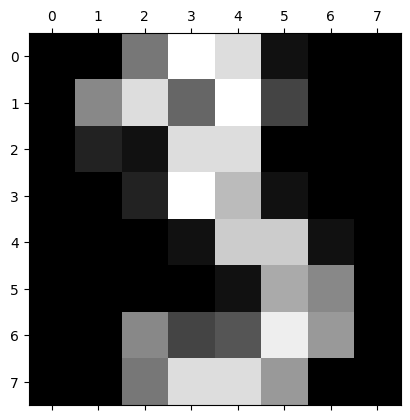

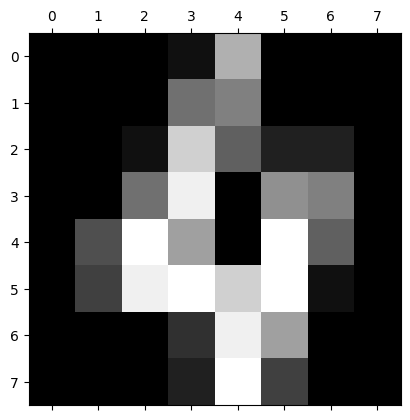

In [19]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [20]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### Create and Train Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [23]:
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
model.score(X_test, y_test)

0.9444444444444444

In [25]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

### Confusion Matrix

In [26]:
y_predicted = model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  2,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 37,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 23,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  2],
       [ 0,  5,  0,  0,  1,  0,  0,  0, 24,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 30]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

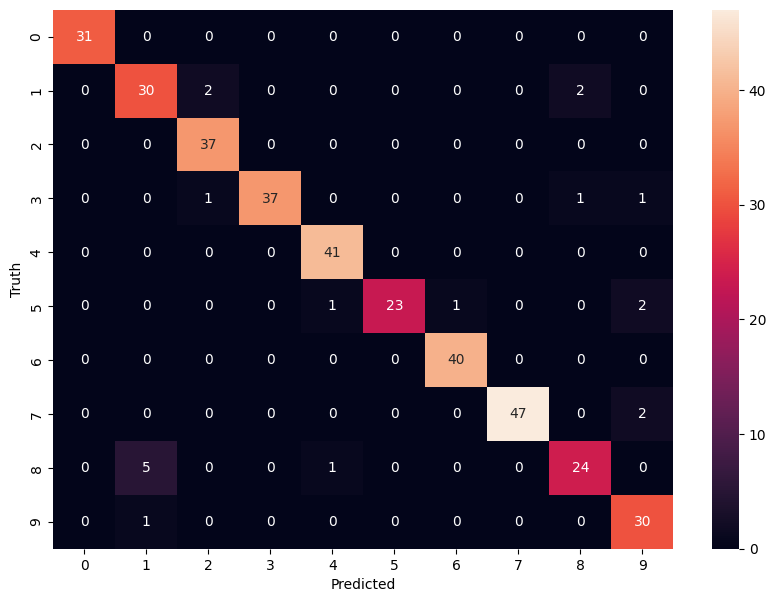

In [28]:
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")